In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import hashlib
import numpy as np
from matplotlib import rc
from ProjectAnalysis import ProjectAnalysis

In [2]:
common_errors = [
    'can\'t read pom.xml: No such file or directory',
    'error: cannot find symbol',
    'error: (.+)\n(.+)',
    'Failed to execute goal org.apache.maven.plugins:maven-compiler-plugin',
    'Failed to execute goal (.*)'
]
pa = ProjectAnalysis("Math",  1)

In [3]:
pa.df().head()

,id,commit,build,exec_time,comment,fix
0,0,0da657a,SUCCESS,40.0,[MATH-996] Fix creation of Fraction/BigFractio...,{}
1,1,1780da7,SUCCESS,18.0,Added Thorsten Schaefer to contributors.,{}
2,2,3815732,SUCCESS,18.0,Fix change message.,{}
3,3,8dc518b,SUCCESS,18.0,[MATH-1028] Added new distance metric EarthMov...,{}
4,4,8a71be7,SUCCESS,17.0,Fix Id tags.,{}


## Calculate the number of builds of each type

In [4]:
pa.df()[(pa.df()['build'] == 'SUCCESS')].count()

id           3858
commit       3858
build        3858
exec_time    3858
comment      3858
fix          3858
dtype: int64

In [5]:
pa.df()[(pa.df()['build'] == 'FAIL')].count()

id           1020
commit       1020
build        1020
exec_time    1020
comment      1020
fix          1020
dtype: int64

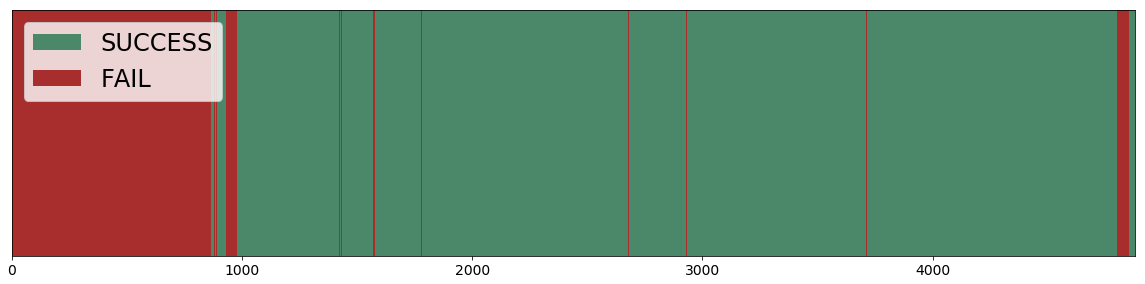

In [6]:
pa.plot_and_save_histogram(1)

## Recogemos todos los fails, los separamos en grupos y obtenemos los logs de cada commit con build fail

In [7]:
fails, groups_of_fails = pa.get_fails_and_grouped_fails()

## Agrupamos los commits por sus logs

In [8]:
errors = pa.group_errors_by_log(fails, common_errors)

In [9]:
df = pd.DataFrame.from_dict(errors, orient='index')
df=df.groupby(['key','trace']).agg({'count': 'sum'}).sort_values(by=['count'], ascending=False)
df.to_csv("%s_errors.csv"%pa.project, sep='\t', encoding='utf-8')
df

,,count
key,trace,
8b2b44943a6d491ed4a37fdae7d112d4,can't read pom.xml: No such file or directory,866
bbbe96be1a3170c4650e5d43b245657f,Failed to execute goal org.jacoco:jacoco-maven-plugin:0.6.3.201306030806:check (check) on project commons-math3: The parameters 'rules' for goal org.jacoco:jacoco-maven-plugin:0.6.3.201306030806:check are missing or invalid -> [Help 1],52
9c7b3c7ef3a0f7d854015b629e8fe10e,Failed to execute goal org.codehaus.mojo:cobertura-maven-plugin:2.7:check (default) on project commons-math: The parameters 'check' for goal org.codehaus.mojo:cobertura-maven-plugin:2.7:check are missing or invalid -> [Help 1],43
66eb9f223332d42c2ae312408c746f11,error: cannot find symbol,28
515863b0649a6f58ee42e47fdebbff00,Failed to execute goal org.apache.maven.plugins:maven-compiler-plugin,10
caefa5dbe1abd0ff1e28d137755970ea,"error: no suitable method found for reinitialize(double,double[],RealMatrix) [ERROR]",4
076cb6b826e1eb8932f23ea7486cfe6c,"error: data has private access in ArrayFieldVector [ERROR] /home/ubuntu/bugs/projects/Math/src/main/java/org/apache/commons/math3/linear/FieldLUDecomposition.java:[350,54] error: data has private access in ArrayFieldVector",2
342df816d9597de73516b2dcb1c17d49,error: cannot assign a value to final variable entries [ERROR] -> [Help 1],2
46be7059ab142c66d8b5e36e0073e00e,"error: name clash: extractField(FieldElement<? extends FieldElement<?>>[][]) in FieldMatrixImpl and <T>extractField(T[][]) in AbstractFieldMatrix have the same erasure, yet neither hides the other [ERROR]",2


In [10]:
pa.view_log_by_hash(errors,'7280ec94ab3fea773d86799defb099ef', 0)

Total commits: 1 | Current commit: e92310e | Log: 

[INFO] Scanning for projects...
[WARNING] 
[WARNING] Some problems were encountered while building the effective model for org.apache.commons:commons-math:jar:3.0-SNAPSHOT
[WARNING] 'build.plugins.plugin.version' for org.apache.maven.plugins:maven-idea-plugin is missing. @ org.apache.commons:commons-parent:20, /home/ubuntu/.m2/repository/org/apache/commons/commons-parent/20/commons-parent-20.pom, line 316, column 15
[WARNING] 
[WARNING] It is highly recommended to fix these problems because they threaten the stability of your build.
[WARNING] 
[WARNING] For this reason, future Maven versions might no longer support building such malformed projects.
[WARNING] 
[INFO]                                                                         
[INFO] ------------------------------------------------------------------------
[INFO] Building Commons Math 3.0-SNAPSHOT
[INFO] -----------------------------------------------------------------------

In [11]:
pa.save_success_commits()

Saved at '../Math/experiment_1/success_commits.txt'
